## Exemplo de segmentação utilizando Detectron2

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

O [dataset](https://universe.roboflow.com/computer-vision-hx9i9/helmet_polygon_v2/dataset/4) utilizado neste exemplo é constituído por 56 imagens de pessoas a utilizar um capacete.

Treino: 54

Validação: 1

Teste: 1


## Aceder ao Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive/') # nome da pasta onde serão colocados os ficheiros do Google Drive -> /nome_da_pasta/MyDrive/

Mounted at /content/drive/


## Instalar Detectron2 e bibliotecas



In [ ]:
# instalar repositório através do Git
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ura5b1hk
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ura5b1hk
  Resolved https://github.com/facebookresearch/detectron2.git to commit 1a4df4d954089534daebbd7a0a45f08ece87056e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6112412 sha256=7d8fe9bcbcd79e2b0ee0039bfcb0d100a

In [ ]:
# Geral
import os
import cv2

from datetime import datetime
from google.colab.patches import cv2_imshow

# Preparação do dataset
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# Visualização
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# Configuração
from detectron2 import model_zoo
from detectron2.config import get_cfg

# Avaliação
from detectron2.engine import DefaultPredictor

# Treino
from detectron2.engine import DefaultTrainer

# Dataset

Fazer unzip do dataset

In [ ]:
# Unzip do dataset
!unzip /content/drive/MyDrive/Exemplo_Codigo/datasets/capacetes.zip -d /content/data/

Archive:  /content/drive/MyDrive/Exemplo_Codigo/datasets/capacetes.zip
  inflating: /content/data/capacetes/README.dataset.txt  
  inflating: /content/data/capacetes/README.roboflow.txt  
   creating: /content/data/capacetes/test/
  inflating: /content/data/capacetes/test/_annotations.coco.json  
  inflating: /content/data/capacetes/test/ppe_0837.rf.447cb668f0d6171aafe33cd34916e00a.jpg  
   creating: /content/data/capacetes/train/
  inflating: /content/data/capacetes/train/_annotations.coco.json  
  inflating: /content/data/capacetes/train/ppe_0826.rf.22b383ae87b4fe99d238c8c053ca36f6.jpg  
  inflating: /content/data/capacetes/train/ppe_0826.rf.9cb88744df1a1aa237ebab97b5466e15.jpg  
  inflating: /content/data/capacetes/train/ppe_0826.rf.fd21464a4b0dc650a2ced591866cd0b7.jpg  
  inflating: /content/data/capacetes/train/ppe_0842.rf.6c709978b9883b66de04fba557643897.jpg  
  inflating: /content/data/capacetes/train/ppe_0842.rf.89d1224643f733888c49dcd0810a3ff2.jpg  
  inflating: /content/data/

### Registar dataset

In [ ]:
DATA_SET_NAME = "capacetes" # nome do dataset
ANNOTATIONS_FILE_NAME = "_annotations.coco.json" # anotações
data_location = "/content/data/capacetes/" # caminho do dataset

In [ ]:
# Dados de treino
TRAIN_DATA_SET_NAME = f"{DATA_SET_NAME}-train"
TRAIN_DATA_SET_IMAGES_DIR_PATH = os.path.join(data_location, "train")
TRAIN_DATA_SET_ANN_FILE_PATH = os.path.join(data_location, "train", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TRAIN_DATA_SET_NAME,
    metadata={},
    json_file=TRAIN_DATA_SET_ANN_FILE_PATH,
    image_root=TRAIN_DATA_SET_IMAGES_DIR_PATH
)

# Dados de teste
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"
TEST_DATA_SET_IMAGES_DIR_PATH = os.path.join(data_location, "test")
TEST_DATA_SET_ANN_FILE_PATH = os.path.join(data_location, "test", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TEST_DATA_SET_NAME,
    metadata={},
    json_file=TEST_DATA_SET_ANN_FILE_PATH,
    image_root=TEST_DATA_SET_IMAGES_DIR_PATH
)

# Dados de validação
VALID_DATA_SET_NAME = f"{DATA_SET_NAME}-valid"
VALID_DATA_SET_IMAGES_DIR_PATH = os.path.join(data_location, "valid")
VALID_DATA_SET_ANN_FILE_PATH = os.path.join(data_location, "valid", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name = VALID_DATA_SET_NAME,
    metadata = {},
    json_file = VALID_DATA_SET_ANN_FILE_PATH,
    image_root = VALID_DATA_SET_IMAGES_DIR_PATH
)

### Visualizar dados de treino

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



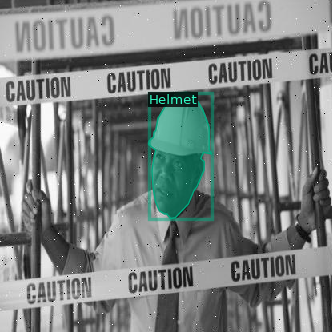

In [ ]:
# Exemplo de dados de treino

metadata = MetadataCatalog.get(TRAIN_DATA_SET_NAME)
dataset_train = DatasetCatalog.get(TRAIN_DATA_SET_NAME)

dataset_entry = dataset_train[0]
image = cv2.imread(dataset_entry["file_name"])

visualizer = Visualizer(
    image[:, :, : : -1],
    metadata = metadata,
    scale = 0.8,
    instance_mode = ColorMode.IMAGE_BW
)

out = visualizer.draw_dataset_dict(dataset_entry)
cv2_imshow(out.get_image()[:, :, : : -1])

## Treinar modelo


### Configuração

In [ ]:
# Parâmetros
ARCHITECTURE = "mask_rcnn_R_101_FPN_3x" # arquitetura utilizada no treino
CONFIG_FILE_PATH = f"COCO-InstanceSegmentation/{ARCHITECTURE}.yaml" # configuração do modelo
MAX_ITER = 1000 # número de iterações
EVAL_PERIOD = 200
BASE_LR = 0.001
NUM_CLASSES = 1

# Output
OUTPUT_DIR_PATH = os.path.join(
    DATA_SET_NAME,
    ARCHITECTURE,
    datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
)

os.makedirs(OUTPUT_DIR_PATH, exist_ok=True)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CONFIG_FILE_PATH) # pesos
cfg.DATASETS.TRAIN = (TRAIN_DATA_SET_NAME,) # dados de treino
cfg.DATASETS.TEST = (TEST_DATA_SET_NAME,) # dados de teste
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32 # feature maps por cada imagem
cfg.TEST.EVAL_PERIOD = EVAL_PERIOD # gravar os resultados a cada x iterações
cfg.DATALOADER.NUM_WORKERS = 2 # número de workers a trabalhar -> carregar os dados
cfg.SOLVER.IMS_PER_BATCH = 2 # batch utilizada em cada iteração
cfg.INPUT.MASK_FORMAT='bitmask' # apenas a máscara se encontra a cores
cfg.SOLVER.BASE_LR = BASE_LR
cfg.SOLVER.MAX_ITER = MAX_ITER
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES
cfg.OUTPUT_DIR = OUTPUT_DIR_PATH # caminho dos outputs

### Treino

In [ ]:
trainer = DefaultTrainer(cfg) # modelo de treino
trainer.resume_or_load(resume=False)
trainer.train() # treino

[09/27 10:02:51 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [00:01, 247MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/27 10:02:52 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/27 10:03:05 d2.utils.events]:  eta: 0:13:53  iter: 19  total_loss: 2.719  loss_cls: 1.326  loss_box_reg: 0.4654  loss_mask: 0.6943  loss_rpn_cls: 0.1822  loss_rpn_loc: 0.02107    time: 0.4246  last_time: 0.4251  data_time: 0.0211  last_data_time: 0.0072   lr: 1.9981e-05  max_mem: 2412M
[09/27 10:03:18 d2.utils.events]:  eta: 0:13:57  iter: 39  total_loss: 2.422  loss_cls: 1.078  loss_box_reg: 0.4903  loss_mask: 0.6791  loss_rpn_cls: 0.0875  loss_rpn_loc: 0.01273    time: 0.4372  last_time: 0.4338  data_time: 0.0137  last_data_time: 0.0061   lr: 3.9961e-05  max_mem: 2413M
[09/27 10:03:28 d2.utils.events]:  eta: 0:14:06  iter: 59  total_loss: 2.248  loss_cls: 0.7442  loss_box_reg: 0.7164  loss_mask: 0.6443  loss_rpn_cls: 0.09396  loss_rpn_loc: 0.01615    time: 0.4438  last_time: 0.4954  data_time: 0.0148  last_data_time: 0.0068   lr: 5.9941e-05  max_mem: 2413M
[09/27 10:03:36 d2.utils.events]:  eta: 0:13:57  iter: 79  total_loss: 1.982  loss_cls: 0.5592  loss_box_reg: 0.7693  loss_ma

### Avaliação

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth") # pesos
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # confiança mínima de cada feature map
predictor = DefaultPredictor(cfg) # modelo de previsões

[09/27 10:21:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from capacetes/mask_rcnn_R_101_FPN_3x/2023-09-27-10-02-45/model_final.pth ...


WARNING [09/27 10:28:52 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/27 10:28:52 d2.data.datasets.coco]: Loaded 1 images in COCO format from /content/data/capacetes/valid/_annotations.coco.json


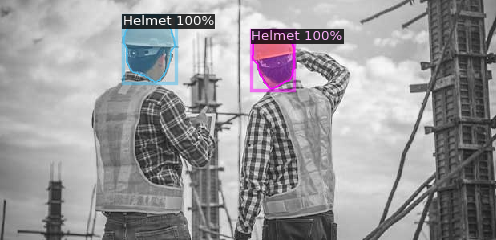

In [ ]:
# inferências

dataset_valid = DatasetCatalog.get(VALID_DATA_SET_NAME)

for d in dataset_valid:
    img = cv2.imread("/content/drive/MyDrive/Exemplo_Codigo/datasets/inferencias/capacetes_inferencias/1.png")
    outputs = predictor(img)

    visualizer = Visualizer(
        img[:, :, ::-1],
        metadata=metadata,
        scale=0.8,
        instance_mode=ColorMode.IMAGE_BW
    )
    out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])